# Human Breast Cancer Data Set
#### by Ventrapragada Sai Rathan

#### Import Required Modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as logisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split as SplitData
from sklearn.model_selection import GridSearchCV as Search
from sklearn.preprocessing import StandardScaler as ScaleData
from sklearn.decomposition import PCA

#### Reading Dataset using pandas

In [2]:
data=pd.read_csv('.\HumanBreastCancer_data_set.csv')
data=data.drop(columns=['Unnamed: 32','id'])
data['diagnosis'].replace(['M','B'],[1,0],inplace=True)
print(data.head(5))
print(data.info())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...            

### Checking Correlation among features

In [3]:
correlation=data.corr(method='pearson')
correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Graph showing number of Malignant vs number of Benign

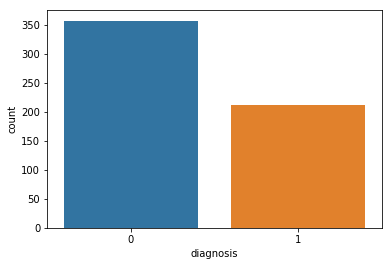

In [4]:
graph=sns.countplot(x='diagnosis',data=data)
plt.show(graph)

### Splitting of Data into Xdata and Ydata

In [5]:
Ydata=data['diagnosis']
Xdata=data.drop(columns=['diagnosis'])
scaler=ScaleData()
scaler=scaler.fit(Xdata)

### Train Test Split

In [6]:
Xtrain,Xtest,Ytrain,Ytest=SplitData(Xdata,Ydata,test_size=0.3)

### Normalising Data

In [7]:
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

### Logistic Regression

In [8]:
cls1=logisticRegression()
cls1.fit(Xtrain,Ytrain)
print("Logistic Regression :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls1.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls1.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls1.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls1.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls1.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls1.predict(Xtest)))

Logistic Regression :
Train Data:
Accuracy = 98.743719%
Classification Report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       248
          1       0.99      0.97      0.98       150

avg / total       0.99      0.99      0.99       398

Confusion Matrix:
[[247   1]
 [  4 146]]

Test Data:
Accuracy = 98.830409%
Classification Report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       109
          1       1.00      0.97      0.98        62

avg / total       0.99      0.99      0.99       171

Confusion Matrix:
[[109   0]
 [  2  60]]


### K Nearest Neighbours

In [9]:
cls2=KNN()
parameters={'n_neighbors':list(range(1,10))}
cls2=Search(cls2,parameters,scoring='accuracy',cv=5)
cls2.fit(Xtrain,Ytrain)
print("Best Hyper Parametrs:",cls2.best_params_)
print("K Nearest Neighbours :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls2.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls2.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls2.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls2.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls2.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls2.predict(Xtest)))

Best Hyper Parametrs: {'n_neighbors': 9}
K Nearest Neighbours :
Train Data:
Accuracy = 96.482412%
Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       248
          1       0.99      0.91      0.95       150

avg / total       0.97      0.96      0.96       398

Confusion Matrix:
[[247   1]
 [ 13 137]]

Test Data:
Accuracy = 97.076023%
Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       109
          1       0.97      0.95      0.96        62

avg / total       0.97      0.97      0.97       171

Confusion Matrix:
[[107   2]
 [  3  59]]


### SVM with RBF kernel

In [10]:
cls3=SVM()
cls3.fit(Xtrain,Ytrain)
print("SVM :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls3.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls3.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls3.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls3.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls3.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls3.predict(Xtest)))

SVM :
Train Data:
Accuracy = 98.241206%
Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       248
          1       1.00      0.95      0.98       150

avg / total       0.98      0.98      0.98       398

Confusion Matrix:
[[248   0]
 [  7 143]]

Test Data:
Accuracy = 98.245614%
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       109
          1       0.97      0.98      0.98        62

avg / total       0.98      0.98      0.98       171

Confusion Matrix:
[[107   2]
 [  1  61]]


### Decision Tree

In [11]:
cls4=DecisionTree()
parameters={'max_depth':list(range(5,20)),'min_samples_leaf':list(range(1,15)),'max_features':list(range(1,9))}
cls4=Search(cls4,parameters,scoring='accuracy',cv=2)
cls4.fit(Xtrain,Ytrain)
print("Best Hyper Parameters from Grid Search Cv are :",cls4.best_params_)
print("Decision Tree :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls4.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls4.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls4.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls4.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls4.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls4.predict(Xtest)))

Best Hyper Parameters from Grid Search Cv are : {'max_depth': 17, 'max_features': 5, 'min_samples_leaf': 8}
Decision Tree :
Train Data:
Accuracy = 95.477387%
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       248
          1       0.95      0.93      0.94       150

avg / total       0.95      0.95      0.95       398

Confusion Matrix:
[[241   7]
 [ 11 139]]

Test Data:
Accuracy = 92.982456%
Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.94      0.94       109
          1       0.89      0.92      0.90        62

avg / total       0.93      0.93      0.93       171

Confusion Matrix:
[[102   7]
 [  5  57]]


# Let us Visualise Data by Dimensionality Reduction

### Principle Component Analysis

In [12]:
pca=PCA(n_components=2)
pca.fit(data.drop(columns=['diagnosis']))
Data_reduced=pd.concat([pd.DataFrame(pca.transform(data.drop(columns=['diagnosis']))),data['diagnosis']],axis=1)

### Viewing Reduced Data and Correlation among features

In [13]:
print(Data_reduced.tail(10))
Data_reduced.corr(method='pearson')

               0           1  diagnosis
559  -479.335707   -4.377873          0
560  -177.242816   43.723143          0
561  -518.011863   -1.530855          0
562    61.940799   35.264802          1
563  1167.136978  105.596679          1
564  1414.126684  110.222492          1
565  1045.018854   77.057589          1
566   314.501756   47.553525          1
567  1124.858115   34.129225          1
568  -771.527622  -88.643106          0


,0,1,diagnosis
0,1.000000e+00,4.499137e-14,0.733037
1,4.499137e-14,1.000000e+00,-0.038906
diagnosis,7.330368e-01,-3.890556e-02,1.000000


### Segregating data into X and Y variables and Normalising them

In [14]:
scaler=ScaleData()
scaler.fit(Data_reduced.drop(columns=['diagnosis']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X=pd.DataFrame(scaler.transform(Data_reduced.drop(columns=['diagnosis'])))
Y=Data_reduced['diagnosis']

### Plotting Data on a 2D plane with different colours for different classes

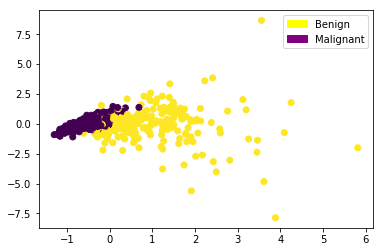

In [16]:
plt.scatter(X[0],X[1],c=Y)
yellow_patch = mpatches.Patch(color='yellow', label='Benign')
purple_patch = mpatches.Patch(color='purple', label='Malignant')
plt.legend(handles=[yellow_patch,purple_patch])
plt.show()

### Applying SVM classifier with RBF kernel on reduced data

In [17]:
cls=SVM()
cls.fit(X,Y)
pred=cls.predict(X)
print(accuracy_score(Y,pred))
print(classification_report(Y,pred))

0.929701230228471
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       357
          1       0.95      0.85      0.90       212

avg / total       0.93      0.93      0.93       569



### Plotting Decision boundary obtained from the classifier

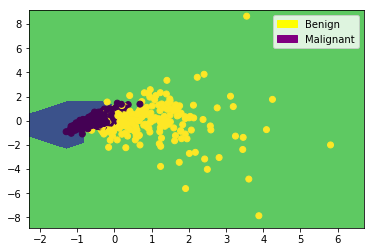

In [18]:
x_min, x_max = X[0].min() - 1, X[0].max() + 1
y_min, y_max = X[1].min() - 1, X[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),np.arange(y_min, y_max, 1))
Z = cls.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,1)
plt.scatter(X[0], X[1], c=Y)
yellow_patch = mpatches.Patch(color='yellow', label='Benign')
purple_patch = mpatches.Patch(color='purple', label='Malignant')
plt.legend(handles=[yellow_patch,purple_patch])
plt.show()